In [1]:
pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-cp37-none-any.whl size=3963 sha256=61bb707f2e9e62637d712cffa4dd74093f91914437e4f653db787da9754af411
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import docx2txt
import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
resumeDataSet = pd.read_csv("/content/drive/MyDrive/resume_dataset/resume_d.csv")

In [4]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
print("Displaying the categories of resume:\n")
print(resumeDataSet['Category'].unique())

Displaying the categories of resume:

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [6]:
print ("Displaying the distinct categories and the number of records in each category:\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories and the number of records in each category:

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
ETL Developer                40
Blockchain                   40
Sales                        40
Mechanical Engineer          40
Data Science                 40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


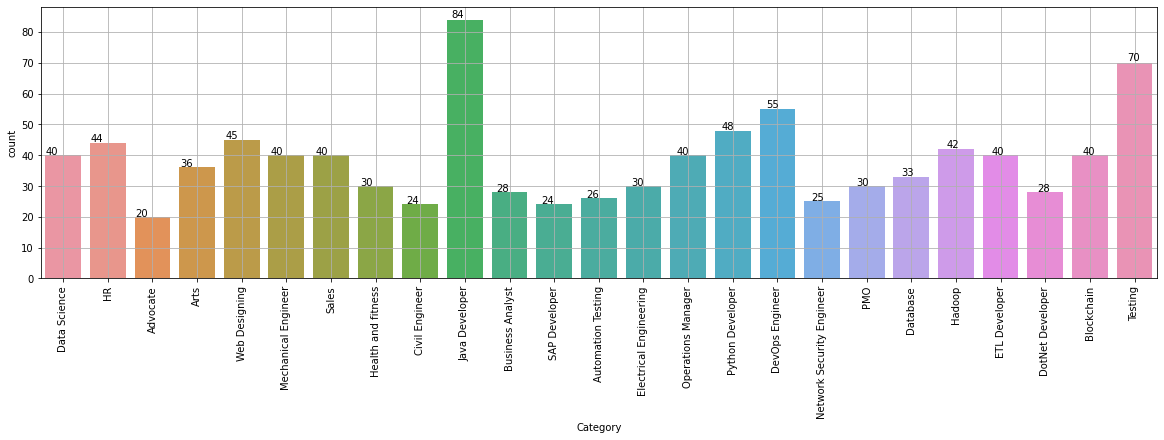

In [7]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

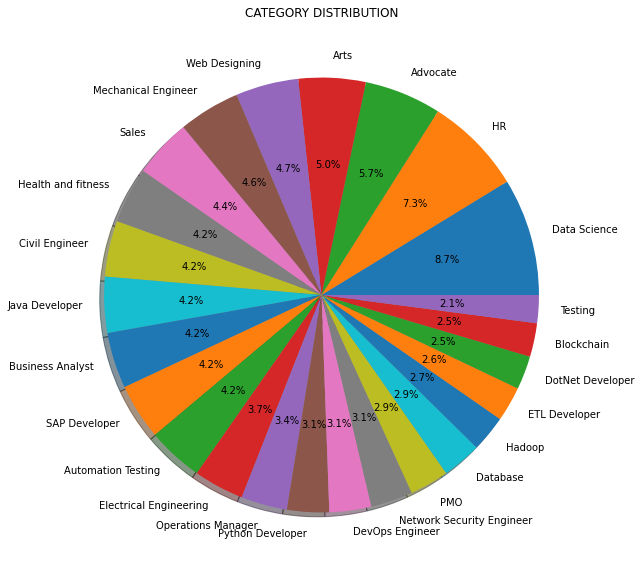

In [8]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()

plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [9]:
# preprocess
stopwords_set = set(stopwords.words('english')+['``',"''"])
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]  # remove stopwords
    return ' '.join(filtered_text)

In [10]:
# Print a sample original resume
print('Original resume:\n')
print(resumeDataSet['Resume'][0])

Original resume:

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Disput

In [11]:
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: clean_text(x))
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b e uit rg...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [12]:
print('Cleaned resume\n')
print(resumeDataSet['cleaned_resume'][0])

Cleaned resume

skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating review p

In [13]:
# Get features and labels from data and shuffle
features = resumeDataSet['cleaned_resume'].values
original_labels = resumeDataSet['Category'].values
labels = original_labels[:]

for i in range(len(resumeDataSet)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0],"\n\n")
print(labels[0])

education details august 2000 b e electronics pune maharashtra pune university operations manager operations manager delta controls dubai fzco skill details company details company delta controls dubai fzco description heading pune branch deltannex integrators pvt ltd aug 17 till date designation operations manager 1st employee 1 reporting gm operations 2 review sow rfq assist proposal team engineering man hours project schedule organization chart meeting client pre sales support 3 review sow rfq client purchase order contract terms conditions 4 project execution plans discussion client consultants 5 kick meeting ad hoc meetings client 6 project evaluation terms outlays profits 7 ensuring appropriate project management framework 8 management contractual commercial issues related project 9 monitoring reviewing reporting project progress 10 coordinating fostering teamwork prioritization team activities 11 monitor project budget 12 apply quality management system processes 13 liaison repo

In [14]:
 X_train, X_test1, y_train, y_test1 = train_test_split(resumeDataSet['cleaned_resume'], resumeDataSet['Category'],
                                                       test_size=0.25, random_state=1)

 X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.25, random_state=1)

# Print size of each split
print("Train: ",len(X_train))
print("Test: ",len(X_test))
print("Val: ",len(X_val))

Train:  721
Test:  61
Val:  180


In [15]:
# Tokenize feature data, print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(X_train)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(X_test)
print(test_feature_sequences[0])

val_feature_sequences = feature_tokenizer.texts_to_sequences(X_val)
print(val_feature_sequences[0])

{'<OOV>': 1, 'exprience': 2, 'company': 3, 'project': 4, 'months': 5, 'description': 6, 'details': 7, 'data': 8, '1': 9, 'management': 10, 'team': 11, '6': 12, 'maharashtra': 13, 'system': 14, 'testing': 15, 'year': 16, 'database': 17, 'development': 18, 'business': 19, 'ltd': 20, 'test': 21, 'less': 22, 'using': 23, 'sql': 24, 'skill': 25, 'january': 26, 'client': 27, 'java': 28, 'developer': 29, 'engineering': 30, 'application': 31, 'pune': 32, 'work': 33, 'services': 34, 'skills': 35, 'c': 36, 'software': 37, 'pvt': 38, 'education': 39, 'responsibilities': 40, 'sales': 41, 'reports': 42, 'process': 43, 'operations': 44, 'requirements': 45, 'customer': 46, 'server': 47, 'technical': 48, 'technologies': 49, 'university': 50, 'india': 51, '2': 52, 'monthscompany': 53, 'design': 54, 'working': 55, 'various': 56, 'environment': 57, 'web': 58, 'python': 59, 'college': 60, 'engineer': 61, 'automation': 62, 'like': 63, 'role': 64, 'time': 65, 'support': 66, 'windows': 67, 'mysql': 68, 'base

In [16]:
# Tokenize label data, print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

train_label_sequences = label_tokenizer.texts_to_sequences(y_train)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(y_test)
print(test_label_sequences[0])

val_label_sequences = label_tokenizer.texts_to_sequences(y_val)
print(val_label_sequences[0])

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'operationsmanager': 8, 'sales': 9, 'etldeveloper': 10, 'blockchain': 11, 'mechanicalengineer': 12, 'datascience': 13, 'arts': 14, 'database': 15, 'healthandfitness': 16, 'electricalengineering': 17, 'pmo': 18, 'businessanalyst': 19, 'dotnetdeveloper': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'civilengineer': 23, 'sapdeveloper': 24, 'advocate': 25}
[5]
[4]
[3]


In [17]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
val_feature_padded = pad_sequences(val_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# example padded sequences
print(train_feature_padded[0])

[  39    7   89   36  244   87   31   32   13   32   50  454   36   32
   13   32   50   36   32   13   32   50   58  314   29  416   29 1953
   38   20   25    7    3    7    3 1953   38   20    6   48   35   58
   18  413  483  248  416  232  134  131   17   68   18  108 1949 1504
 4299  238 4300   47  578  959 3248  112  378  163   88   67    3 1953
   38   20    6   32 4301  139  364  295    4    7    4 4302 2213   14
   49   81  121  188  248  416  134  232   17   81   24   11  292    9
  437   37   29  836    4 1158 1506   54  352   81 1831   85 4303 1044
    4 2031  805 4304   14   49   81  121  188  248  416  134  232   17
   81   24   11  292   52  437   37   29  836  805 4305 2694  339  252
 4306  180 1131  507 1733 1048 4307 4308  228   34 1477 2694 1862    4
 3278 4309   14   49   81  121  188  248  416  134  232   28  280   17
   81   24   11  292   52  437   37   29  836  261 4310  893  893  103
 1298 2794  293  423  103 1073   90  737  212 3565    4 4311 4312   49
   81 

In [18]:
embedding_dim = 64

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 64)             384000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1690      
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#convert data into numpy arrays
# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)
val_feature_padded = np.array(val_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)
val_label_sequences = np.array(val_label_sequences)

print(train_feature_padded.shape)
print(train_label_sequences.shape)

(721, 300)
(721, 1)


In [20]:
# Train the neural network
num_epochs = 15

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(val_feature_padded, val_label_sequences), verbose=2)

Epoch 1/15
23/23 - 12s - loss: 3.2156 - accuracy: 0.1290 - val_loss: 3.2074 - val_accuracy: 0.0556
Epoch 2/15
23/23 - 7s - loss: 2.9880 - accuracy: 0.1845 - val_loss: 2.9265 - val_accuracy: 0.1333
Epoch 3/15
23/23 - 7s - loss: 2.4212 - accuracy: 0.2552 - val_loss: 2.3375 - val_accuracy: 0.2444
Epoch 4/15
23/23 - 7s - loss: 2.0254 - accuracy: 0.4480 - val_loss: 2.1259 - val_accuracy: 0.4278
Epoch 5/15
23/23 - 7s - loss: 1.5392 - accuracy: 0.5978 - val_loss: 1.4640 - val_accuracy: 0.6444
Epoch 6/15
23/23 - 7s - loss: 1.0508 - accuracy: 0.7393 - val_loss: 1.3071 - val_accuracy: 0.6389
Epoch 7/15
23/23 - 7s - loss: 0.9668 - accuracy: 0.7864 - val_loss: 1.0265 - val_accuracy: 0.7167
Epoch 8/15
23/23 - 7s - loss: 0.6040 - accuracy: 0.8571 - val_loss: 0.6017 - val_accuracy: 0.8833
Epoch 9/15
23/23 - 7s - loss: 0.3656 - accuracy: 0.9487 - val_loss: 0.3878 - val_accuracy: 0.9167
Epoch 10/15
23/23 - 7s - loss: 0.2320 - accuracy: 0.9653 - val_loss: 0.2523 - val_accuracy: 0.9500
Epoch 11/15
23/23 

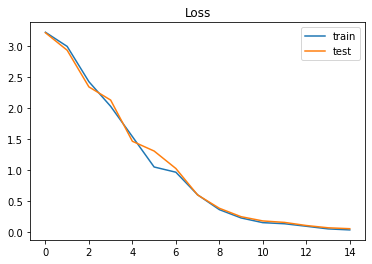

In [21]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

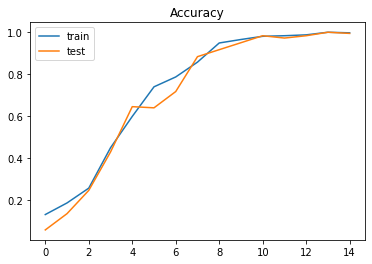

In [22]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [23]:
# Save model
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [24]:
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)

with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(encoding_to_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'operationsmanager': 8, 'sales': 9, 'etldeveloper': 10, 'blockchain': 11, 'mechanicalengineer': 12, 'datascience': 13, 'arts': 14, 'database': 15, 'healthandfitness': 16, 'electricalengineering': 17, 'pmo': 18, 'businessanalyst': 19, 'dotnetdeveloper': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'civilengineer': 23, 'sapdeveloper': 24, 'advocate': 25}
{1: 'javadeveloper', 2: 'testing', 3: 'devopsengineer', 4: 'pythondeveloper', 5: 'webdesigning', 6: 'hr', 7: 'hadoop', 8: 'operationsmanager', 9: 'sales', 10: 'etldeveloper', 11: 'blockchain', 12: 'mechanicalengineer', 13: 'datascience', 14: 'arts', 15: 'database', 16: 'healthandfitness', 17: 'electricalengineering', 18: 'pmo', 19: 'businessanalyst', 20: 'dotnetdeveloper', 21: 'automationtesting', 22: 'networksecurityengineer', 23: 'civilengineer', 24: 'sapdeveloper', 25: 'advocate'}


In [25]:
from google.colab import files
uploaded = files.upload()

Saving s job desc.docx to s job desc.docx
Saving s res.docx to s res.docx


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
resume = docx2txt.process("s res.docx")
desc = docx2txt.process("s job desc.docx")
text = [resume,desc]
count_matrix  =cv.fit_transform(text)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
matchpercent = cosine_similarity(count_matrix)[0][1]*100
matchpercent = round(matchpercent,2)
print("Your resume matches about ", matchpercent, "% with the job description.")

Your resume matches about  38.79 % with the job description.


In [28]:
resume

'SUMMARY\n\nTechnically advanced Java Developer with 7+ years of experience in designing, developing and delivering user-centric software applications using Java/J2EE technologies. Offering strong expertise in multiple programming languages, including JavaScript, HTML, and XML. Seeking to secure a challenging position as a Java Developer.\n\nPROFESSIONAL EXPERIENCE\n\nIT AMERICA INC., Arizona City, AZ\nJava Developer, September 2015 – Present\n\nUse Java/J2EE technologies to develop web applications for client server environments and add functionalities to existing applications.\n\nRevamp various Java applications developed with Spring, Hibernate and older J2EE.\n\nConduct user requirements analysis to design and program applications and deliver support for system enhancement.\n\nPlay a pivotal role as a part of an agile scrum team accountable, developing new applications using Spring framework backend and Angular.js frontend.\n\nConsult with customers on project status and technical c

In [29]:
example_sequence = feature_tokenizer.texts_to_sequences([clean_text(resume)])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[ 968 3001 1189   28   29  145  358   91  314  116 1473  103 3808   37
   155   23   28  540   49    1  501  594  213  222  223  271  131  121
  1047    1 1367 4296  437   28   29  507   91    1 1322    1 2924    1
    28   29 1251  178  511  353   28  540   49  203   58  155   27   47
   634 1897 4576  325  155    1   56   28  155  120  335  428 2767  540
   703  103   45  107   54  257  155 1976   66   14 1323 4094 1550   64
   373  477 1085   11 3644  116   86  155   23  335  238  689  509  425
  1173    1  128    4  343   48 3595 1928    1 4889   28   29  187  421
   651  178    1    1   48  594   37   18  493  794  205   28   49  203
   155   69  940   27   45  120 5541 2856  911    1   23  131  121  398
   188  599 1920   58  155  245  229   15  155  116  832   21  215    1
  2443   75  296    1   31  100  434  963 2385  402  199 2856    1    1
    27 1918    1  103   91   39   50    1 4055    1  244  105   87  105
   259  421    1 4061    1    1   78   12   83  414 2269   35  2

In [30]:
# Make a prediction
prediction = model.predict(example_padded)

# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))

print("Top 5 jobs the applicant should apply for:\n")
for i in range(5):
  print(encoding_to_label[indices[i]])

Top 5 jobs the applicant should apply for:

dotnetdeveloper
javadeveloper
civilengineer
automationtesting
advocate


In [ ]:
resume_example = 'skills bitcoin ethereum solidity hyperledger beginner go beginner r3 corda beginner tendermint nodejs c programming java machine learning specilaized brain computer interface computer networking server admin computer vision data analytics cloud computing reactjs angulareducation details january 2014 january 2018 bachelor engineering computer science engineering thakur college engineering technology september 2016 march 2017 dynamic blood bank system mumbai maharashtra iit january 2014 cbse senior secondary january 2011 cbse banking vidyashram public school blockchain developer blockchain developer zhypility technologies skill details networking exprience 27 months data analytics exprience 11 months computer vision exprience 6 months java exprience 6 months machine learning exprience 6 monthscompany details company zhypility technologies description une 2018 company area business owner amway enterprise limited description business strategizing promotion analytics networking terms company virtual description developing prototype smart india hackthon deployment level 3 networking switch intern bharti airtel private limited mumbai company 1 international research scholar university rome tor vergata rome description nov 2017 nov 2017 done research reality based brain computer interface proposed paper international journal advanced research ijar 20656 epted paper reviewer smart kisan revolutionizing country ijsrd epted publication company description reliance jio mumbai dec 2017 jan 2017 company maharastra state government hackthon description company virtual description handling group interns marketing sales team nearby promote social media platform nearby products company promotion stock marketing drums foods international description company 8 data science web analytics positron internet virtual description company description making people aware women equality rights raise voice violence various modes events sources media help society company iit bombay iit kgp startup description company iit bombay iit kgp startup description'